In [68]:
import pandas as pd
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data

,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [83]:
#Splitting the data into training and testing data

#whole data exclude the last row as X
X = data[:-1]  

#target columns
good_result1_target_column = data['542236']
good_result2_target_column = data['67321']
mid_result_target_column = data['549295']
bad_result1_target_column = data['41108']
bad_result2_target_column = data['541982']

#target column exclude the first row as y
good1_y = good_result1_target_column[1:]
good2_y = good_result2_target_column[1:] 
mid_y = mid_result_target_column[1:] 
bad1_y = bad_result1_target_column[1:]
bad2_y = bad_result2_target_column[1:]

n = len(X)-36 #number of data points for training and testing

X_train = X.iloc[:n, :] #training data
X_test = X.iloc[n:, :] #testing data

#good1 target column training and testing data
good1_y_train = good1_y.iloc[:n]
good1_y_test = good1_y.iloc[n:]

#good2 target column training and testing data
good2_y_train = good2_y.iloc[:n]
good2_y_test = good2_y.iloc[n:]

#mid target column training and testing data
mid_y_train = mid_y.iloc[:n]
mid_y_test = mid_y.iloc[n:]

#bad1 target column training and testing data
bad1_y_train = bad1_y.iloc[:n]
bad1_y_test = bad1_y.iloc[n:]

#bad2 target column training and testing data
bad2_y_train = bad2_y.iloc[:n]
bad2_y_test = bad2_y.iloc[n:]

#print(X_train)
#print(X_test)
#print(good1_y_train)
#print(good1_y_test)
#print(good2_y_train)
#print(good2_y_test)
#print(mid_y_train)
#print(mid_y_test)
#print(bad1_y_train)
#print(bad1_y_test)
#print(bad2_y_train)
#print(bad2_y_test)

print("X_train_Head: ", X_train.iloc[0,0])
print("X_train_Tail: ", X_train.iloc[-1,0])
print("X_test_Head: ", X_test.iloc[0,0])
print("X_test_Tail: ", X_test.iloc[-1,0])



X_train_Head:  19910101
X_train_Tail:  20201201
X_test_Head:  20210101
X_test_Tail:  20231201


In [51]:
# The models we use to do the prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

def model_fit_predict(y_train):
    predictions = {}  # Initialize an empty dictionary

    # Decision Tree Regressor
    DT = DecisionTreeRegressor(random_state=42)
    DT.fit(X_train, y_train)
    predictions['DT'] = DT.predict(X_test)

    # Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions['LR'] = LR.predict(X_test)

    # Lasso Regression
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, y_train)
    predictions['Lasso'] = Lasso_model.predict(X_test)

    # Support Vector Regression
    SVR_model = SVR()
    SVR_model.fit(X_train, y_train)
    predictions['SVR'] = SVR_model.predict(X_test)

    # Multi-Layer Perceptron Regressor
    MLP = MLPRegressor()
    MLP.fit(X_train, y_train)
    predictions['MLP'] = MLP.predict(X_test)

    # Gradient Boosting Regressor
    GBR = GradientBoostingRegressor()
    GBR.fit(X_train, y_train)
    predictions['GBR'] = GBR.predict(X_test)

    return predictions

good1_predictions = model_fit_predict(good1_y_train)
good2_predictions = model_fit_predict(good2_y_train)
mid_predictions = model_fit_predict(mid_y_train)
bad1_predictions = model_fit_predict(bad1_y_train)
bad2_predictions = model_fit_predict(bad2_y_train)

print(good1_predictions)
# print(good2_predictions)
# print(mid_predictions)
# print(bad1_predictions)
# print(bad2_predictions)





c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+08, tolerance: 8.337e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.114e+02, tolerance: 1.579e+01
  model = cd_fast.en

{'DT': array([26190.52, 26190.52, 25924.44, 26190.52, 23370.15, 26190.52,
       26190.52, 27437.5 , 27437.5 , 25073.01, 28510.48, 27437.5 ,
       27437.5 , 27437.5 , 23370.15, 25073.01, 27437.5 , 28510.48,
       28510.48, 33000.  , 40000.  , 44355.77, 64904.01, 40159.3 ,
       50875.  , 60000.  , 64904.01, 40159.3 , 40000.  , 40000.  ,
       41356.63, 40159.3 , 64904.01, 40159.3 , 64904.01, 64904.01]), 'LR': array([  47639.62406022,   76291.28892127,   84007.60211534,
         84367.32291944,   92340.22236385,   54781.46611355,
         61810.77499469,   45423.7240802 ,   61840.48634965,
         97622.29592426,   68620.39617335,   -5656.78853467,
         12197.3138489 ,   22208.96454527,   48551.26685627,
         83029.64500493,   25410.53970033,  -78984.27977377,
       -192600.59306291,  -74258.57026851,    4273.77436649,
         14767.37497133,   16667.95001831,  -42587.65764038,
       -279896.2774728 , -262251.89454046, -199466.66852274,
       -175483.77846867, -113652.2

In [88]:
import numpy as np
def calculate_accuracies(predictions, y_test):
    average_accuracies = {}
    individual_accuracies = {}

    for model, model_predictions in predictions.items():
        # Calculate accuracy for each prediction
        accuracies = (1 - np.abs(model_predictions - y_test) / y_test) * 100

        # Calculate average accuracy for the model
        average_accuracy = np.mean(accuracies)

        # Store the average accuracy, rounded to two decimal places
        average_accuracies[model] = round(average_accuracy, 2)

        # Store individual accuracies
        individual_accuracies[model] = accuracies

    return average_accuracies, individual_accuracies

# Calculate accuracies
good1_avg_acc, good1_ind_acc = calculate_accuracies(good1_predictions, good1_y_test)
good2_avg_acc, good2_ind_acc = calculate_accuracies(good2_predictions, good2_y_test)
mid_avg_acc, mid_ind_acc = calculate_accuracies(mid_predictions, mid_y_test)
bad1_avg_acc, bad1_ind_acc = calculate_accuracies(bad1_predictions, bad1_y_test)
bad2_avg_acc, bad2_ind_acc = calculate_accuracies(bad2_predictions, bad2_y_test)


#pick the best model for each target column
good1_best_model = max(good1_avg_acc, key=good1_avg_acc.get)
good2_best_model = max(good2_avg_acc, key=good2_avg_acc.get)
mid_best_model = max(mid_avg_acc, key=mid_avg_acc.get)
bad1_best_model = max(bad1_avg_acc, key=bad1_avg_acc.get)
bad2_best_model = max(bad2_avg_acc, key=bad2_avg_acc.get)

print("Avg_Good1: ", good1_avg_acc)
#print(good2_ind_acc)
print("Avg_Good2: ", good2_avg_acc)
#print(mid_ind_acc)
print("Avg_Mid: ", mid_avg_acc)
#print(bad1_ind_acc)
print("Avg_Bad1: ", bad1_avg_acc)
#print(bad2_ind_acc)
print("Avg_Bad2: ", bad2_avg_acc)

print("Best_Good1: ", good1_best_model, good1_avg_acc[good1_best_model]) 
print("Best_Good2: ", good2_best_model, good2_avg_acc[good2_best_model])
print("Best_Mid: ", mid_best_model, mid_avg_acc[mid_best_model])
print("Best_Bad1: ", bad1_best_model, bad1_avg_acc[bad1_best_model])
print("Best_Bad2: ", bad2_best_model, bad2_avg_acc[bad2_best_model])

Avg_Good1:  {'DT': 84.79, 'LR': -183.68, 'Lasso': 17.35, 'SVR': 61.08, 'MLP': -313.58, 'GBR': 86.2}
Avg_Good2:  {'DT': 96.47, 'LR': 70.49, 'Lasso': 94.69, 'SVR': 79.18, 'MLP': -130877.2, 'GBR': 97.81}
Avg_Mid:  {'DT': 79.45, 'LR': -212.78, 'Lasso': 78.32, 'SVR': 69.69, 'MLP': -707486.15, 'GBR': 87.05}
Avg_Bad1:  {'DT': 44.27, 'LR': -734.57, 'Lasso': 63.81, 'SVR': 70.8, 'MLP': -203581.89, 'GBR': 65.88}
Avg_Bad2:  {'DT': 27.04, 'LR': -1504.31, 'Lasso': 8.65, 'SVR': 61.08, 'MLP': -565461.58, 'GBR': 55.55}
Best_Good1:  GBR 86.2
Best_Good2:  GBR 97.81
Best_Mid:  GBR 87.05
Best_Bad1:  SVR 70.8
Best_Bad2:  SVR 61.08


C:\Users\Asus\AppData\Local\Temp\ipykernel_19372\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


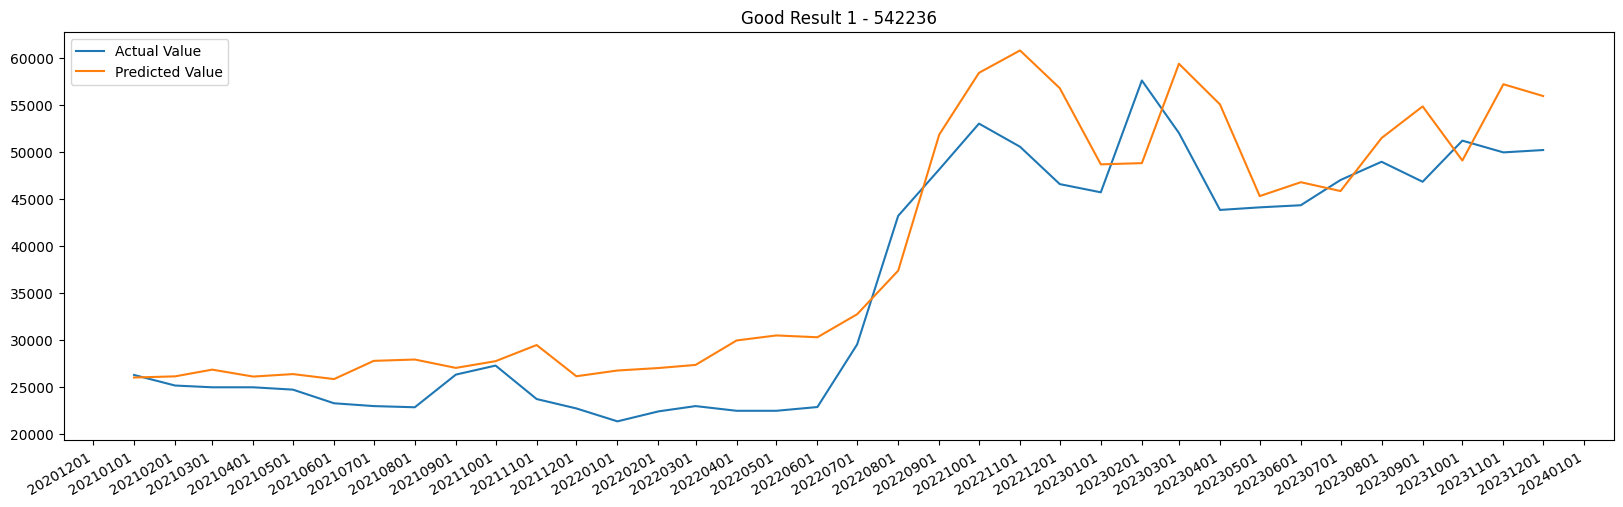

C:\Users\Asus\AppData\Local\Temp\ipykernel_19372\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


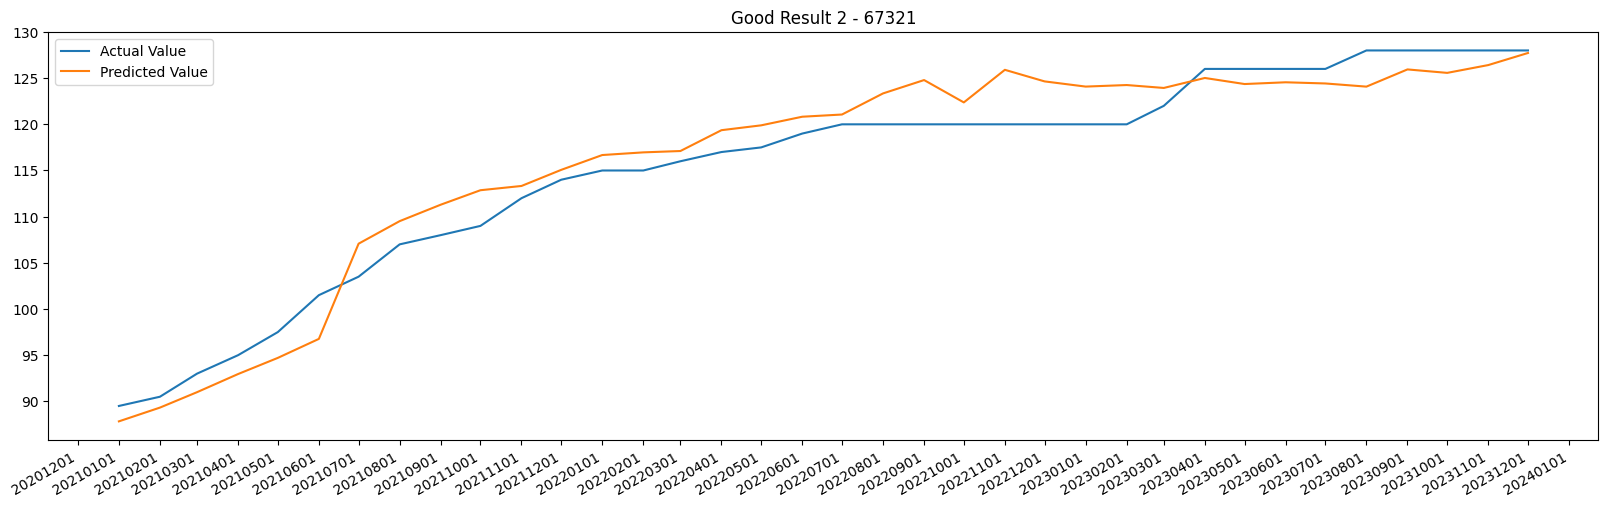

C:\Users\Asus\AppData\Local\Temp\ipykernel_19372\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


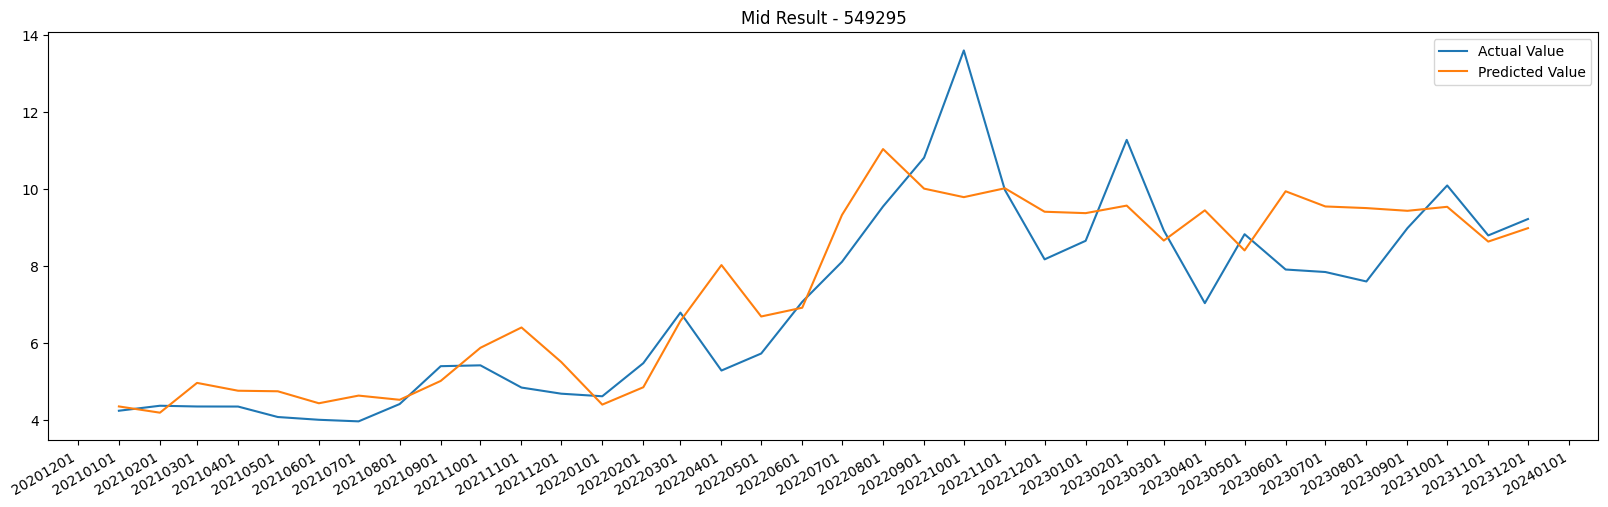

C:\Users\Asus\AppData\Local\Temp\ipykernel_19372\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


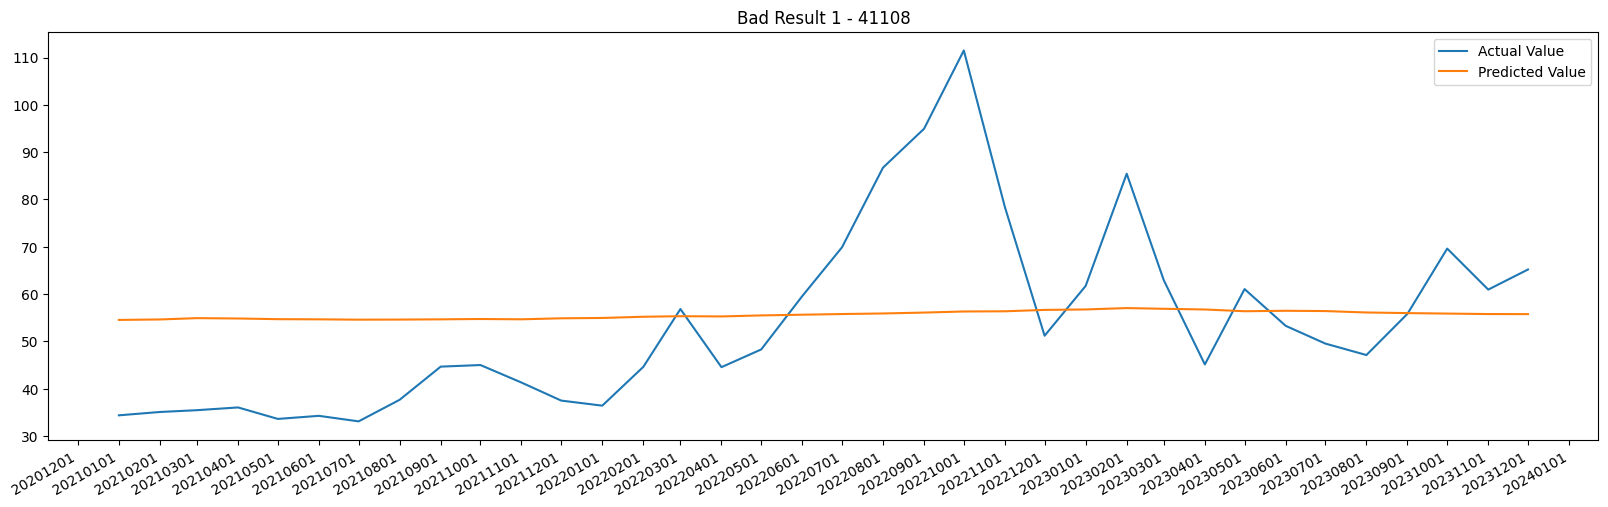

C:\Users\Asus\AppData\Local\Temp\ipykernel_19372\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


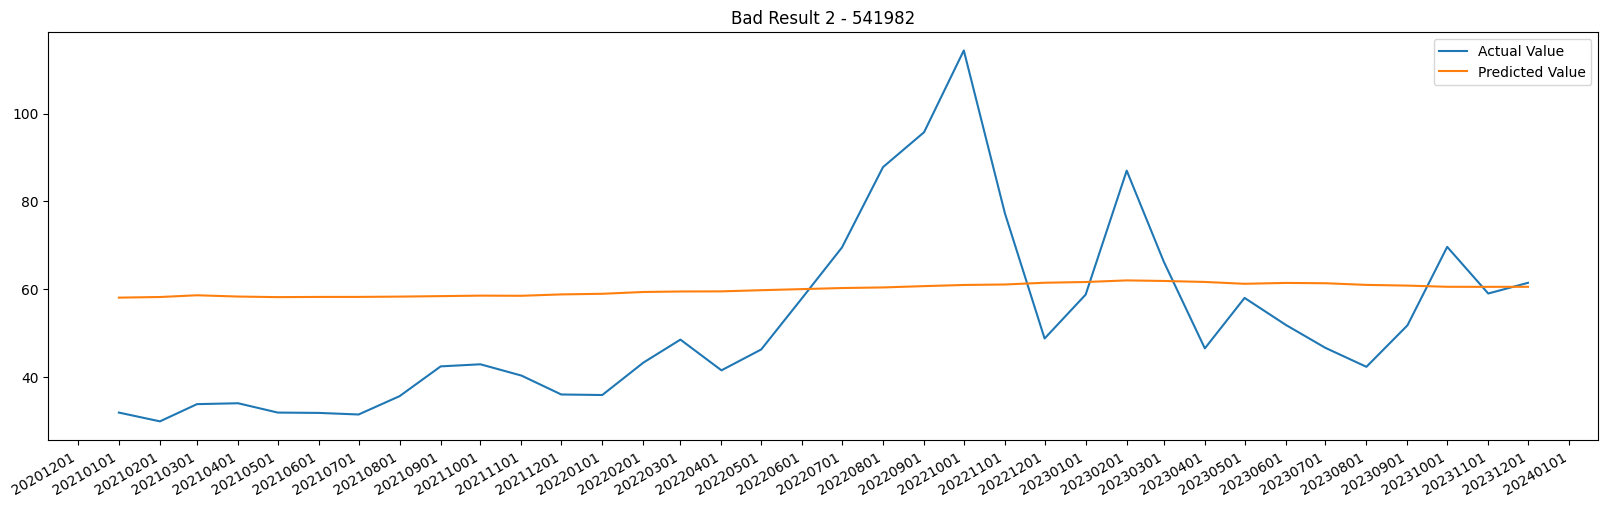

In [53]:
# plot a graph of the best model for each target column that show the prediction and the actual value
#x axis is the index of the testing data
#y axis is the actual value and the predicted value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_best_model(best_model, y_test, predictions, title):
    X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')
    plt.figure(figsize=(20,6))
    plt.plot(X_test['Datetime'], y_test, label='Actual Value')
    plt.plot(X_test['Datetime'], predictions[best_model], label='Predicted Value')
    plt.title(title)
    plt.legend()
     # Format the dates on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    plt.show()

plot_best_model(good1_best_model, good1_y_test, good1_predictions, 'Good Result 1 - 542236')
plot_best_model(good2_best_model, good2_y_test, good2_predictions, 'Good Result 2 - 67321')
plot_best_model(mid_best_model, mid_y_test, mid_predictions, 'Mid Result - 549295')
plot_best_model(bad1_best_model, bad1_y_test, bad1_predictions, 'Bad Result 1 - 41108')
plot_best_model(bad2_best_model, bad2_y_test, bad2_predictions, 'Bad Result 2 - 541982')



In [79]:
# write an csv file
# first colume is the time series, this is first column of the X_test
# second column is the actual value, this is the y_test
# third column is the predicted value, this is the y_pred
# fourth column is the accuracy, this is the accuracy
# fifth column is the average accuracy, this is the avg_accuracy

import csv

def write_csv(y_test, y_pred, ind_acc, avg_acc, filename):
    with open(filename, 'w', newline='') as file:
        X_test_local = X_test.set_index('Unnamed: 0')
        writer = csv.writer(file)
        writer.writerow(["Time Series", "Target Value", "Predicted Value", "Accuracy", "Average Accuracy"])
        for i in range(len(y_test)):
            if i == 0:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], avg_acc])
            else:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], ""])

write_csv(good1_y_test, good1_predictions[good1_best_model], good1_ind_acc[good1_best_model], good1_avg_acc[good1_best_model], '542236_good1.csv')
write_csv(good2_y_test, good2_predictions[good2_best_model], good2_ind_acc[good2_best_model], good2_avg_acc[good2_best_model], '67321_good2.csv')
write_csv(mid_y_test, mid_predictions[mid_best_model], mid_ind_acc[mid_best_model], mid_avg_acc[mid_best_model], '549295_mid.csv')
write_csv(bad1_y_test, bad1_predictions[bad1_best_model], bad1_ind_acc[bad1_best_model], bad1_avg_acc[bad1_best_model], '41108_bad1.csv')
write_csv(bad2_y_test, bad2_predictions[bad2_best_model], bad2_ind_acc[bad2_best_model], bad2_avg_acc[bad2_best_model], '541982_bad2.csv')     